In this lab, we will be seeing how we can use PID control to stabilize systems that are generally very unstable.

In [192]:
import numpy as np,math,time,matplotlib.pyplot as plt,sys
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [166]:
class Cart:
    def __init__(self,x,mass):
        self.x = x  
        self.y = 0
        self.mass = mass

class Pendulum:
    def __init__(self,length,theta,ball_mass):
        self.length = length
        self.theta = theta
        self.ball_mass = ball_mass

In [167]:
#Constants:
g = 9.81


In [168]:
def PID_Control(cart, pendulum, dt, error, previous_error, integral, Kp=-150, Kd=-20, Ki=-20):
    # Using PID to find control inputs

    # The gains were emperically tuned

    derivative = (error - previous_error) / dt
    integral += error * dt
    Output_force = (Kp * error) + (Kd * derivative) + (Ki * integral)
    return Output_force, integral

In [169]:
#These apply a force F using the equations of motion for the cart and pendulum.

def Apply_Force(cart, pendulum, F, dtime, x_2, dtheta, theta_2, previous_dtime):
    
    a_theta = (((cart.mass + pendulum.ball_mass) * g * math.sin(pendulum.theta)) + (F * math.cos(pendulum.theta)) - \
        (pendulum.ball_mass * ((dtheta)**2.0) * pendulum.length * math.sin(pendulum.theta) * math.cos(pendulum.theta))) \
         / (pendulum.length * (cart.mass + (pendulum.ball_mass * (math.sin(pendulum.theta)**2.0)))) 
    
    a_x = ((pendulum.ball_mass * g * math.sin(pendulum.theta) * math.cos(pendulum.theta)) - \
        (pendulum.ball_mass * pendulum.length * math.sin(pendulum.theta) * (dtheta**2)) + (F)) \
         / (cart.mass + (pendulum.ball_mass * (math.sin(pendulum.theta)**2)))
    
    cart.x += ((dtime**2) * a_x) + (((cart.x - x_2) * dtime) / previous_dtime)
    
    pendulum.theta += ((dtime**2)*a_theta) + (((pendulum.theta - theta_2)*dtime) / previous_dtime)


In [170]:
def find_error(pendulum):

    # This function returns the error
    error = (pendulum.theta % (2 * math.pi)) - 0
    if error > math.pi:
        error -= (2 * math.pi)
    return error

In [185]:
def plot_graphs(times,errors,theta,force,x):
    # This function plots all the graphs
    plt.figure(figsize=(20,10))
    
    plt.subplot(4, 1, 1)
    plt.plot(times,errors,'-b')
    plt.ylabel('Error')
    plt.xlabel('Time')

    plt.subplot(4, 1, 2)
    plt.plot(times,theta,'-b')
    plt.ylabel('Theta')
    plt.xlabel('Time')

    plt.subplot(4, 1, 3)
    plt.plot(times,force,'-b')
    plt.ylabel('Force')
    plt.xlabel('Time')

    plt.subplot(4, 1, 4)
    plt.plot(times,x,'-b')
    plt.ylabel('X')
    plt.xlabel('Time')

    plt.show()

In [186]:
# Initializing constants
mass_of_ball = 1.0
mass_of_cart = 5.0

In [202]:
errors, force, theta, times, x = [],[],[],[],[]
simulation_time = 6
previous_timestamp = time.time()
end_time = previous_timestamp + simulation_time

In [188]:
#Initializing the cart
cart = Cart(0, mass_of_cart)
pendulum = Pendulum(1, 1, mass_of_ball)

In [189]:
# Initializing other variables needed for the simulation
d_theta = 0
theta_1 = theta_2 = pendulum.theta # x_{t-1} = x_{t-2} = pendulum starting point
x_1 = x_2 = cart.x
previous_error = find_error(pendulum)
integral = 0
previous_dtime = 0

In [190]:
# The simulation must run for the desired amount of time
while time.time() <= end_time:
    
    #calculating timestep (dtime) and the current error.
    current_timestamp = time.time()
    dtime = (current_timestamp - previous_timestamp)
    error = find_error(pendulum)
    
    if previous_dtime != 0: # This condition is to make sure that theta_dot is not infinity in the first step
        
        
        #finding the derivatives of the angle and x position over the timestep.
        d_theta = (theta_1 - theta_2 ) / previous_dtime
        d_x = (x_1 - x_2) / previous_dtime
        
        #finding the control and applying it to the card.
        F,intergral = PID_Control(cart, pendulum, dtime, error, previous_error, integral)
        Apply_Force(cart, pendulum, F, dtime, x_2, d_theta, theta_2, previous_dtime)
        
        # For plotting the graphs
        
        force.append(F)
        x.append(cart.x)
        errors.append(error)
        times.append(current_timestamp)
        theta.append(pendulum.theta)
        
    # Update the variables
        
    previous_dtime = dtime
    previous_timestamp = current_timestamp
    previous_error = error
    
    theta_2 = theta_1
    theta_1 = pendulum.theta
    x_2 = x_1
    x_1 = cart.x

In [199]:
#Making it a function:

def runSim(mass_of_cart=5, mass_of_ball=1, Kp=-150, Kd=-20, Ki=-20):
    
    cart = Cart(0, mass_of_cart)
    pendulum = Pendulum(1, 1, mass_of_ball)
    
    errors, force, theta, times, x = [],[],[],[],[]
    simulation_time = 15
    previous_timestamp = time.time()
    end_time = previous_timestamp + simulation_time
    
    d_theta = 0
    theta_1 = theta_2 = pendulum.theta # x_{t-1} = x_{t-2} = pendulum starting point
    x_1 = x_2 = cart.x
    previous_error = find_error(pendulum)
    integral = 0
    previous_dtime = 0
    
    while time.time() <= end_time:
    
    #calculating timestep (dtime) and the current error.
        current_timestamp = time.time()
        dtime = (current_timestamp - previous_timestamp)
        error = find_error(pendulum)
    
        if previous_dtime != 0: # This condition is to make sure that theta_dot is not infinity in the first step
        
        
        #finding the derivatives of the angle and x position over the timestep.
            d_theta = (theta_1 - theta_2 ) / previous_dtime
            d_x = (x_1 - x_2) / previous_dtime
        
        #finding the control and applying it to the card.
            F,intergral = PID_Control(cart, pendulum, dtime, error, previous_error, integral)
            Apply_Force(cart, pendulum, F, dtime, x_2, d_theta, theta_2, previous_dtime)
        
        # For plotting the graphs
        
            force.append(F)            
            x.append(cart.x)
            errors.append(error)
            times.append(current_timestamp)
            theta.append(pendulum.theta)
        
    # Update the variables
        
        previous_dtime = dtime
        previous_timestamp = current_timestamp
        previous_error = error
    
        theta_2 = theta_1
        theta_1 = pendulum.theta
        x_2 = x_1
        x_1 = cart.x
    
    plot_graphs(times,errors,theta,force,x)
    
    
    
    
    

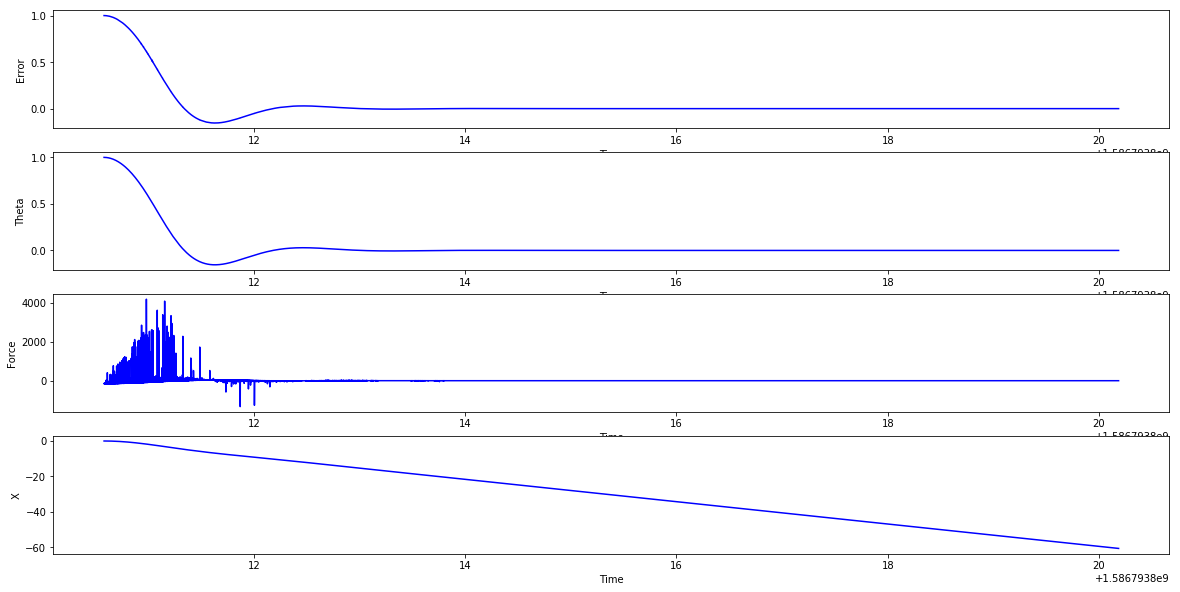

In [194]:
plot_graphs(times,errors,theta,force,x)

In [203]:
interact(runSim, mass_of_cart=widgets.IntSlider(min=1, max=10, step=1, value=5), \
                 mass_of_ball=widgets.IntSlider(min=1, max=10, step=1, value=1), \
                 Kp=widgets.IntSlider(min=-200, max=200, step=5, value=-150), \
                 Kd=widgets.IntSlider(min=-200, max=200, step=5, value=-20), \
                 Ki=widgets.IntSlider(min=-200, max=200, step=5, value=-20))

interactive(children=(IntSlider(value=5, description='mass_of_cart', max=10, min=1), IntSlider(value=1, descri…

<function __main__.runSim(mass_of_cart=5, mass_of_ball=1, Kp=-150, Kd=-20, Ki=-20)>

REFERENCES:

Based off of:

https://github.com/Nikkhil16/Inverted_Pendulum, <-- Especially this one!

https://www.moorepants.info/blog/npendulum.html\,

https://github.com/gilbertgede/idetc-2013-paper/blob/master/n-pendulum-control.ipynb,




In [159]:
'''
Need to do: 

Make the graphs better, 

Add more visuals and explanations / documentation.

Reorganize the functions to make it more smooth.

Have a way to see what changing the PID coefficients does in real time.


'''

'\nNeed to do: \n\nMake the graphs better, \n\nAdd more visuals and explanations / documentation.\n\nReorganize the functions to make it more smooth.\n\nHave a way to see what changing the PID coefficients does in real time.\n\n\n'